In [1]:
import numpy as np
from PIL import Image
import matplotlib as plt

%matplotlib inline

In [2]:
!ls images

barbara.png  boat512.gif  hibiscus.bmp	lena.bmp


In [3]:
import glob

list_img = glob.glob("images/*")

L = []

for img in list_img:
    im = Image.open(img)
    L.append(np.array(im))
    
L

[array([[[ 26,  59,   0],
         [ 27,  59,   0],
         [ 26,  55,   0],
         ...,
         [ 22,  31,   4],
         [ 22,  30,   0],
         [ 20,  26,   0]],
 
        [[ 28,  62,   0],
         [ 26,  60,   0],
         [ 25,  58,   0],
         ...,
         [ 21,  29,   0],
         [ 19,  26,   0],
         [ 16,  22,   0]],
 
        [[ 26,  61,   0],
         [ 22,  58,   0],
         [ 20,  57,   0],
         ...,
         [ 16,  27,   0],
         [ 14,  22,   0],
         [ 13,  18,   0]],
 
        ...,
 
        [[130,  36,   0],
         [132,  39,   0],
         [133,  38,   0],
         ...,
         [ 53,  40,   5],
         [ 51,  38,   4],
         [ 49,  37,   0]],
 
        [[126,  31,   0],
         [130,  38,   0],
         [134,  41,   0],
         ...,
         [ 51,  41,   5],
         [ 49,  38,   4],
         [ 48,  37,   0]],
 
        [[115,  28,   0],
         [121,  32,   0],
         [128,  35,   0],
         ...,
         [ 46,  40,   5],
  

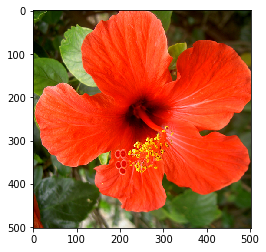

In [4]:
import matplotlib.pyplot

matplotlib.pyplot.imshow(L[0])

# Question 1 : TF 

### q-1.1

In [5]:
def create_synt(size=(50, 50), d=5):
    im = np.zeros((50, 50))
    for i in range(d, 50, d):
        im[:,i] = 1
    return im

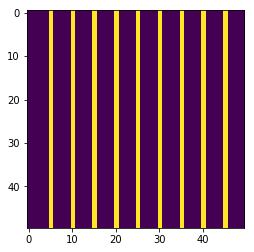

In [6]:
im = create_synt()

matplotlib.pyplot.imshow(im)

In [7]:
def fourier_transform(img):
    im = np.fft.fft2(img)
    return np.fft.fftshift(im)

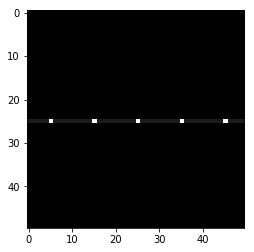

In [8]:
imf = fourier_transform(im)

matplotlib.pyplot.imshow(np.abs(imf), cmap="gray")

###  Q-1.2

d = 10

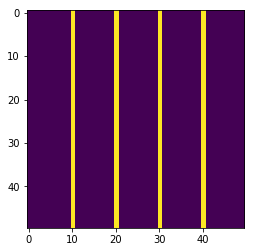

In [9]:
im = create_synt(d=10)

matplotlib.pyplot.imshow(im)

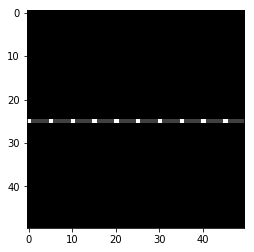

In [10]:
imf = fourier_transform(im)

matplotlib.pyplot.imshow(np.abs(imf), cmap="gray")

d = 50

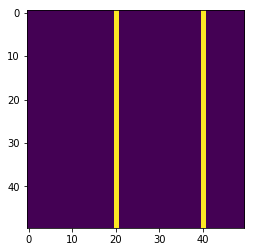

In [11]:
im = create_synt(d=20)

matplotlib.pyplot.imshow(im)

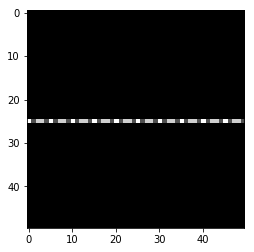

In [12]:
imf = fourier_transform(im)

matplotlib.pyplot.imshow(np.abs(imf), cmap="gray")

On observe que les points sont de plus en plus rapprochés.

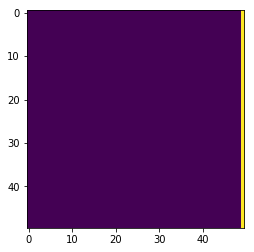

In [13]:
im = create_synt(d=49)

matplotlib.pyplot.imshow(im)

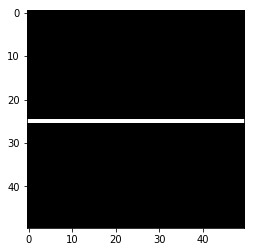

In [14]:
imf = fourier_transform(im)

matplotlib.pyplot.imshow(np.abs(imf), cmap="gray")

# Question 2: TF d'une image réelle

### q-2.1

In [15]:
!ls images/

barbara.png  boat512.gif  hibiscus.bmp	lena.bmp


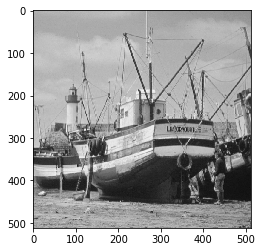

In [16]:
boat = np.array(Image.open("images/boat512.gif"))

matplotlib.pyplot.imshow(boat, cmap="gray")

[[314.         298.0545133  109.47900884 ...  63.25608527 109.47900884
  298.0545133 ]
 [286.71762928 249.45190097 158.82664599 ... 267.67463245 256.75504339
  159.18174585]
 [ 69.19836187 156.37987902 106.28828395 ... 204.7415144  163.88770079
  210.23989115]
 ...
 [242.29976259  57.10392371 162.41734586 ... 285.89202566 151.69879383
  195.1047744 ]
 [ 69.19836187 210.23989115 163.88770079 ... 400.77555279 106.28828395
  156.37987902]
 [286.71762928 159.18174585 256.75504339 ... 206.17868944 158.82664599
  249.45190097]]
[[ 3.14159265  2.66198364  0.08372894 ...  0.49558968 -0.08372894
  -2.66198364]
 [ 2.8812085  -2.93440342  1.81363628 ... -2.87693381 -2.004814
  -2.70157993]
 [-2.18623231  1.86905548  1.07864911 ...  0.38732315 -2.11784242
   2.69847469]
 ...
 [ 3.13847095 -1.08005696  1.24307845 ... -2.02966968 -3.1079368
   3.11246897]
 [ 2.18623231 -2.69847469  2.11784242 ... -1.92894306 -1.07864911
  -1.86905548]
 [-2.8812085   2.70157993  2.004814   ... -1.70857177 -1.81363628

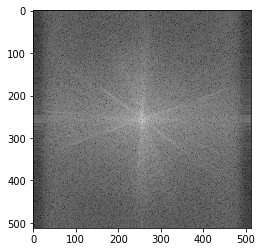

In [17]:
boat_fft = fourier_transform(boat)

module = np.abs(boat_fft)
print(module)
arg = np.angle(boat_fft)
print(arg)
matplotlib.pyplot.imshow(np.log(module), cmap="gray")

C'est curieux !

###  q-2.2

**

### q-2.3

In [18]:
def tf_inverse(img):
    im = np.fft.ifft2(img)
    return im

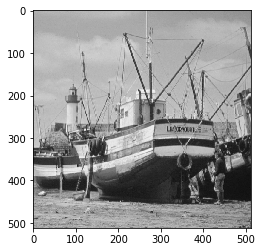

In [19]:
image = tf_inverse(boat_fft)
matplotlib.pyplot.imshow(np.abs(image), cmap="gray")

# Question 3: Inverse module and phase

### q-3.1

Get two images

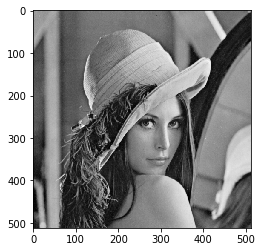

In [20]:
lena = np.array(Image.open("images/lena.bmp"))
matplotlib.pyplot.imshow(lena, cmap="gray")

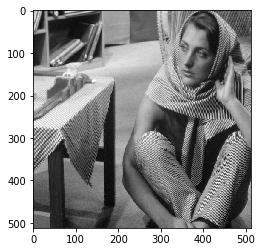

In [21]:
barbara = np.array(Image.open("images/barbara.png"))
matplotlib.pyplot.imshow(barbara, cmap="gray")

Get the module of barbara and phase of lena

module:  [[180 202 202 ... 103 102  91]
 [172 198 201 ...  94  96  97]
 [175 195 193 ...  87  96  98]
 ...
 [ 99  97  97 ... 113 113 117]
 [ 93  97  98 ... 111 112 114]
 [ 95  94  99 ... 113 103 108]]
phase:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


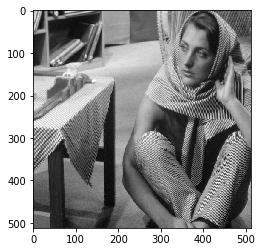

In [22]:
import cmath

module = np.abs(barbara)
print("module: ", module)
phase = np.angle(lena)
print("phase: ", phase)

image_final = module * np.exp(complex(0,1) * phase)
matplotlib.pyplot.imshow(np.abs(image_final), cmap="gray")

### q-3.2

module:  [[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]
phase:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


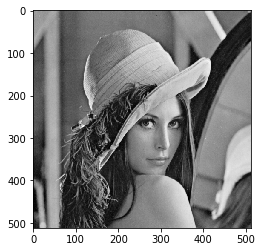

In [23]:
import cmath

module = np.abs(lena)
print("module: ", module)
phase = np.angle(barbara)
print("phase: ", phase)

image_final = module * np.exp(complex(0,1) * phase)
matplotlib.pyplot.imshow(np.abs(image_final), cmap="gray")

### q-3.3

Le plus important est le module pour conserver l'image

# Question 4: 

### q-4.1

Get the image and convert it in gray_level

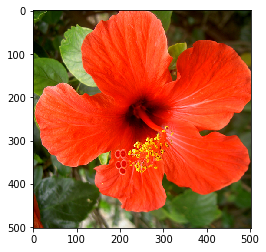

In [24]:
hibiscus = np.array(Image.open("images/hibiscus.bmp"))
matplotlib.pyplot.imshow(np.abs(hibiscus))

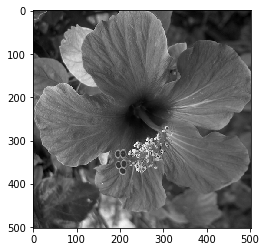

In [25]:
from skimage.color import rgb2gray

gray_hibis = rgb2gray(hibiscus)
matplotlib.pyplot.imshow(gray_hibis, cmap="gray")

Translation

In [26]:
import math

Tx = 20.9898
Ty = 40.981234342

fourier = (np.fft.fft2(gray_hibis))

        
translate = np.array([fourier[m][n] * np.exp(-2 * math.pi * 1j * (Tx * m / len(fourier) + Ty * n / len(fourier[0]))) for m in range(len(fourier)) for n in range(len(fourier[0]))])

translate = translate.reshape((len(fourier),len(fourier[0])))

translate

array([[ 8.74428658e+04   +0.j        , -4.78624490e+03-1095.71548965j,
        -3.07796617e+03+1636.8646021j , ...,
         1.07468830e+03-1558.15915408j, -2.86404278e+03-1987.57651777j,
        -4.88190806e+03 +525.0774319j ],
       [-3.45195820e+03+1333.88941006j, -1.10844444e+04+4122.6371077j ,
         3.25587988e+03 +524.32268641j, ...,
        -9.35760896e+02-2582.83107968j,  4.41881185e+03+1868.92212827j,
        -5.09703573e+03 -692.59854687j],
       [-2.78831220e+03+2569.07621433j,  3.01980405e+03+3081.46604602j,
        -8.22975799e+01+2196.21358577j, ...,
        -3.09470798e+03+1128.55803507j,  1.16412202e+03 +101.93663745j,
         1.02436286e+03+2504.57839009j],
       ...,
       [ 2.28421821e+03 -508.34859482j, -9.34181694e+02 -647.86003725j,
         1.28805108e+03 +807.04314008j, ...,
         1.96331276e+02 -248.529642j  , -3.45344507e+02+2916.75509808j,
        -1.84044441e+03-1855.27852748j],
       [-2.61805237e+03-2742.37840709j,  1.46075731e+03-2277.8104059

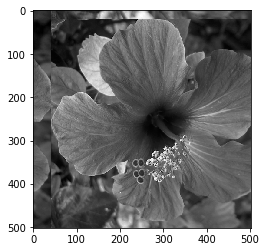

In [27]:
gray = (np.fft.ifft2(translate))
matplotlib.pyplot.imshow(np.abs(gray), cmap="gray")

### q-4.2

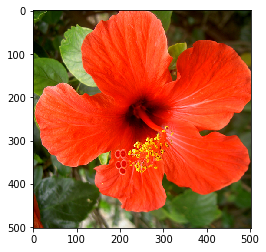

In [28]:
color_hibis = hibiscus
matplotlib.pyplot.imshow(color_hibis)

In [29]:
import math

Tx = 20.9898
Ty = 40.981234342

fourier = (np.fft.fftn(color_hibis))

print(fourier.shape)

    
translate = np.array([fourier[m][n] / 255 * np.exp(-2 * math.pi * 1j * (Tx * m / len(fourier) + Ty * n / len(fourier[0]))) for m in range(len(fourier)) for n in range(len(fourier[0]))])

translate = translate.reshape((len(fourier),len(fourier[0]), 3))

translate

(502, 502, 3)


array([[[ 2.67541537e+05    +0.j        ,
          1.24172631e+05-35719.46570009j,
          1.24172631e+05+35719.46570009j],
        [-2.16996550e+04 +3853.88022111j,
         -1.92121691e+04+16719.95962832j,
         -1.76579123e+04+17901.43756304j],
        [-2.87724967e+03 +8866.91089685j,
          1.08952162e+04+12615.88158544j,
          1.11649697e+04 +8382.92469761j],
        ...,
        [ 2.35676432e+03 -6162.25883638j,
         -1.41740536e+02 -6139.35132715j,
          6.24853476e+02 -4425.40309917j],
        [-1.81421268e+03 -9143.81249042j,
          1.20735762e+04 -7011.32882774j,
          1.23036400e+04-11246.62829535j],
        [-2.10956403e+04 -6379.76332655j,
         -1.54294741e+04-19854.33611916j,
         -1.71119228e+04-18863.89646802j]],

       [[-2.44818351e+04 +5760.1631116j ,
         -3.54360190e+04 +2779.15421641j,
         -3.48930901e+04 +5254.06794349j],
        [-3.10792010e+04+12449.27576674j,
         -3.54228083e+03 +7654.23768659j,
         -6.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


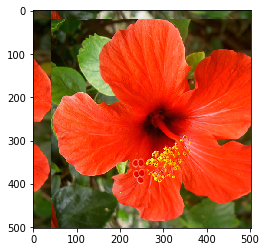

In [30]:
color_inv = (np.fft.ifftn(translate))
matplotlib.pyplot.imshow(np.abs(color_inv))

### q-4.3 (BONUX)

In [34]:
# TODO

# Question 5: Correlation of phase

### q-5.1

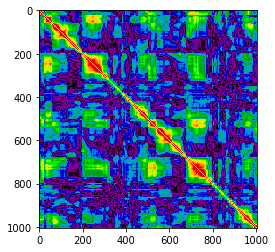

In [31]:
hibiscus_color =  hibiscus
hibiscus_gray = gray_hibis

img_corr = np.corrcoef(gray, hibiscus_gray)

matplotlib.pyplot.imshow(np.abs(img_corr), cmap="nipy_spectral")

### q-5.2

In [33]:
# TODO

### q-5.3

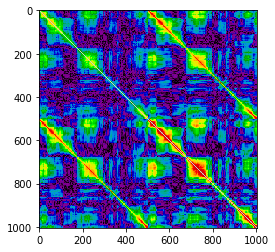

In [32]:
from skimage.util import random_noise

image_noise = random_noise(hibiscus_gray)
img_corr = np.corrcoef(image_noise, hibiscus_gray)

matplotlib.pyplot.imshow(np.abs(img_corr), cmap="nipy_spectral")

### q-5.4 (BONUX)

In [ ]:
# TODO